In [34]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import misc
import random

from visual_generator import VisualGenerator
visualizer = VisualGenerator(image_folder='/home/ubuntu/sdf/results', node_folder='/home/ubuntu/sdf/results')
layers = ['conv4', 'conv5']

image_root = '/home/ubuntu/sdf/images/'
activation_root = '/home/ubuntu/sdf/activations/'

In [67]:
layer_lut = []
activation_list = []
size_sum = 0
for layer in layers:
    activation_list.append(np.load(activation_root  + layer + '.npy'))
    size_sum += activation_list[-1].shape[1]
    layer_lut.append(size_sum)
activations = np.concatenate(activation_list, 1)
print(activations.shape)
print(layer_lut)

(100000, 640)
[384, 640]


In [68]:
# Read in path for all the images

image_list_file = open('/home/ubuntu/sdf/activations/input.txt')
image_list = []
while True:
    path = image_list_file.readline()
    if not path:
        break
    image_list.append(path.strip())

In [76]:
# Normalize activations
avg_activation = np.tile(np.sqrt(np.sum(activations ** 2, 0)), (len(image_list), 1))
activations = np.divide(activations, avg_activation)

In [ ]:
len(image_list)

In [ ]:
def plot_activations(index):
    plt.imshow(misc.imread(image_root + image_list[index]))
    plt.show()
    nodes = []
    max_nodes = np.argsort(activation[index, :])[-20:]
    for i in max_nodes:
        nodes.append({'layer': layer, 'index': i})
    fig = plt.figure(figsize=(20, 13))
    plt.imshow(visualizer.visualize_in_grid(nodes))
    plt.show()
    

In [14]:
import random
plot_activations(random.randint(0, len(image_list)-1))

NameError: name 'plot_activations' is not defined

In [87]:
similarity = np.dot(activations.transpose(), activations)
def plot_similar(query):
    most_similar = np.argsort(similarity[query, :])[-20:][::-1]
    print(most_similar, query)
    nodes = []
    for index in most_similar:
        for i in range(len(layer_lut)):
            if index < layer_lut[i]:
                layer = layers[i]
                if i == 0:
                    layer_index = index
                else:
                    layer_index = index % layer_lut[i-1]
                break
        nodes.append({'layer': layer, 'index': layer_index})
    fig = plt.figure(figsize=(20, 13))
    plt.imshow(visualizer.visualize_in_grid(nodes))
    plt.show()

(array([367, 118,  10,  41,  45,  38,  64, 104, 113,  23, 355, 251, 382,
       318,  92,  18, 364, 307, 167, 347]), 367)
(2, 40, 12, 7, 42)


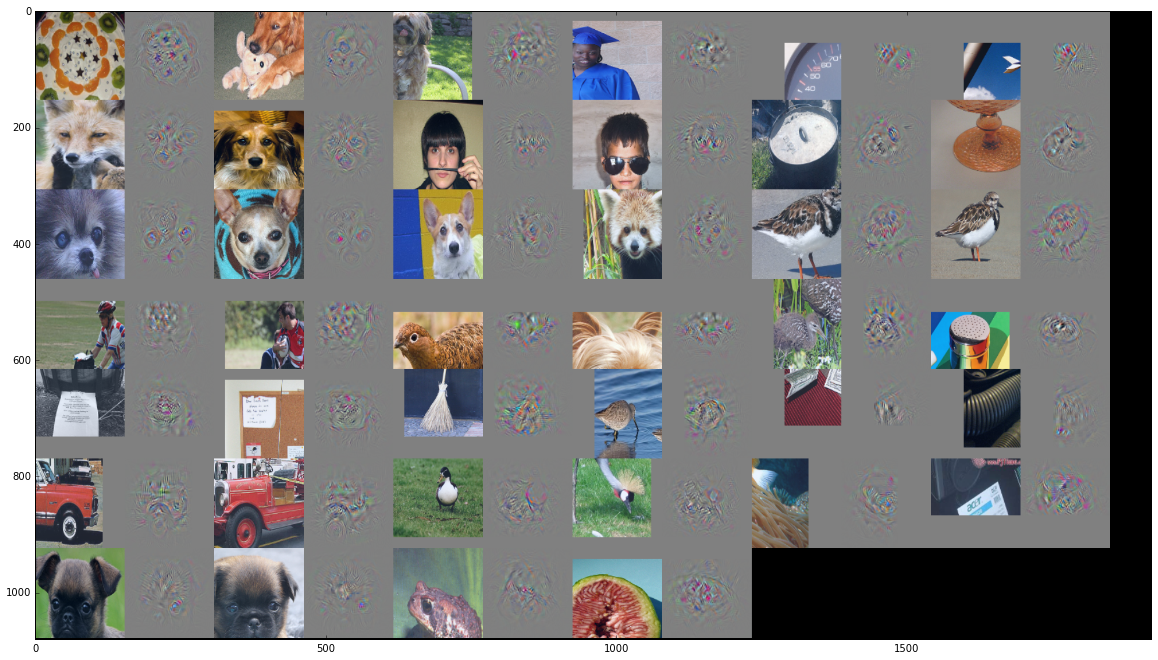

In [90]:
import random
plot_similar(random.randint(0, similarity.shape[0]))

array([ 1.,  2.])

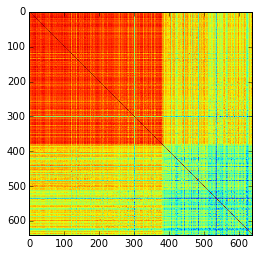

In [83]:
plt.imshow(similarity)